In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_blobs

from build.autoneuronet import (
    ops,
    Var,
    Matrix,
    Linear,
    ReLU,
    Tanh,
    Sigmoid,
    NeuralNetwork,
    GradientDescentOptimizer,
    MSELoss,
    BCELoss,
)

# Linear Regression


In [2]:
# Linear Regression
n_samples = 10

X = Matrix(n_samples, 1)  # shape: (n_samples, 1)
y = Matrix(n_samples, 1)  # shape: (n_samples, 1)

for i in range(n_samples):
    X[i, 0] = Var(i)
    y[i, 0] = 5.0 * i + 3.0

In [3]:
lr = 1e-2
epochs = 1000

lr_model = NeuralNetwork([Linear(1, 1)])
optimizer = GradientDescentOptimizer(learning_rate=lr, model=lr_model)

lr_model

NeuralNetwork =
Linear(1, 1)

In [ ]:
# Training Loop

for epoch in range(epochs):
    optimizer.resetGrad()

    # Forward pass
    y_pred = lr_model.forward(X)

    # Calculate the loss
    loss = MSELoss(y, y_pred)
    loss_val = loss.getVal()

    # Backpropagation
    loss.setGrad(1.0)
    loss.backward()
    optimizer.optimize()

    if epoch % 100 == 0:
        print(f"Epoch: {epoch + 1} | Train Loss: {loss_val}")

Epoch: 1 | Train Loss: 912.3878533991121
Epoch: 101 | Train Loss: 0.419488013320288
Epoch: 201 | Train Loss: 0.1351491398660016
Epoch: 301 | Train Loss: 0.04354186395446318
Epoch: 401 | Train Loss: 0.014028161174453265
Epoch: 501 | Train Loss: 0.004519542529053015
Epoch: 601 | Train Loss: 0.0014560899620341516
Epoch: 701 | Train Loss: 0.0004691178286092927
Epoch: 801 | Train Loss: 0.00015113869531224586
Epoch: 901 | Train Loss: 4.869332143784062e-05


In [5]:
# Make Predictions
y_pred = lr_model.forward(X)

print(f"Ground Truth Labels:\n{y}\n")
print(f"Final Linear Regression Model Predictions:\n{y_pred}")

first_layer = lr_model.layers[0]
W_learned, b_learned = first_layer.W, first_layer.b

print(f"Learned W(0, 0) = {W_learned[0, 0]}")
print(f"Learned b(0, 0) = {b_learned[0, 0]}")

Ground Truth Labels:
Matrix(10 x 1) = 
3.000000 
8.000000 
13.000000 
18.000000 
23.000000 
28.000000 
33.000000 
38.000000 
43.000000 
48.000000 


Final Linear Regression Model Predictions:
Matrix(10 x 1) = 
2.992639 
7.993813 
12.994987 
17.996161 
22.997335 
27.998509 
32.999682 
38.000856 
43.002030 
48.003204 

Learned W(0, 0) = Var(val=5.001174, grad=0.000667)
Learned b(0, 0) = Var(val=2.992639, grad=-0.004180)


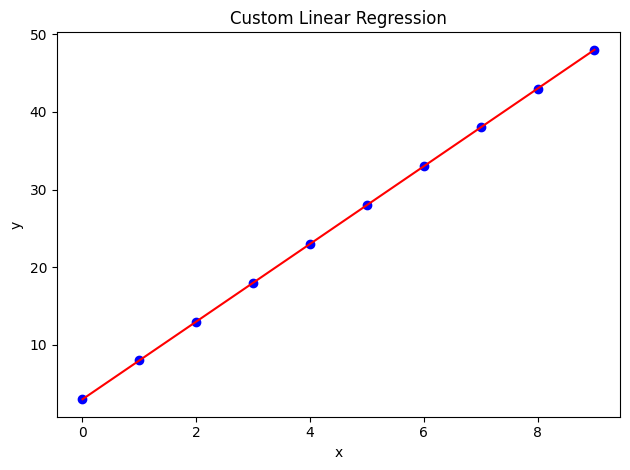

In [6]:
x_np = np.array([X[i, 0].getVal() for i in range(X.rows)])
y_np = np.array([y[i, 0].getVal() for i in range(y.rows)])
y_pred_np = np.array([y_pred[i, 0].getVal() for i in range(y_pred.rows)])

plt.scatter(x_np, y_np, color="blue")
plt.plot(x_np, y_pred_np, color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Custom Linear Regression")

plt.tight_layout()
plt.show()

# Classification with ReLU and Simgoid


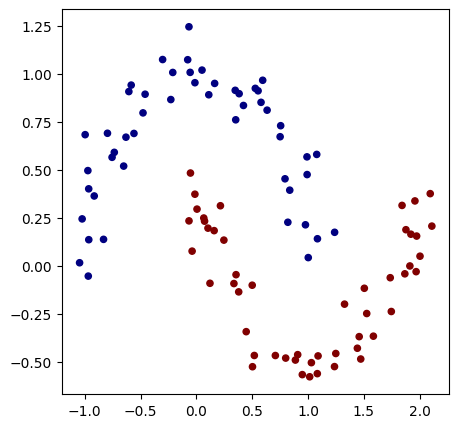

In [7]:
X, y = make_moons(n_samples=100, noise=0.1)
# X, y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=3.0)

plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap="jet")

In [8]:
def numpy_to_matrix(numpy_array: np.ndarray) -> Matrix:
    numpy_array = np.asarray(numpy_array, dtype=float)

    if numpy_array.ndim == 1:
        numpy_array = numpy_array.reshape(-1, 1)
    elif numpy_array.ndim != 2:
        raise ValueError("Please pass in a 1D or 2D array")

    rows, cols = numpy_array.shape
    matrix = Matrix(rows, cols)

    for i in range(rows):
        for j in range(cols):
            matrix[i, j] = numpy_array[i, j]

    return matrix

In [9]:
X_matrix = numpy_to_matrix(X)
y_matrix = numpy_to_matrix(y)

In [16]:
lr = 1e-2
epochs = 5000

model = NeuralNetwork(
    [
        Linear(2, 16, init="he"),
        ReLU(),
        Linear(16, 16, init="he"),
        ReLU(),
        Linear(16, 1, init="he"),
        Sigmoid(),
    ]
)
optimizer = GradientDescentOptimizer(learning_rate=lr, model=model)

model

NeuralNetwork =
Linear(2, 16)
ReLU()
Linear(16, 16)
ReLU()
Linear(16, 1)
Sigmoid()

In [ ]:
# Training Loop

for epoch in range(epochs):
    optimizer.resetGrad()

    # Forward pass
    y_pred = model.forward(X_matrix)

    # Calculate the loss
    loss = BCELoss(y_matrix, y_pred)
    loss_val = loss.getVal()

    # Backpropagation
    loss.setGrad(1.0)
    loss.backward()
    optimizer.optimize()

    if epoch % 100 == 0:
        print(f"Epoch: {epoch + 1} | Train Loss: {loss_val}")

Epoch: 1 | Train Loss: 0.7740471547848604
Epoch: 101 | Train Loss: 0.43878945282866894
Epoch: 201 | Train Loss: 0.3776784465083207
Epoch: 301 | Train Loss: 0.3416542339216363
Epoch: 401 | Train Loss: 0.3158198420655625
Epoch: 501 | Train Loss: 0.2934940658800319
Epoch: 601 | Train Loss: 0.2754386283552375
Epoch: 701 | Train Loss: 0.2607353567942049
Epoch: 801 | Train Loss: 0.24888523941146595
Epoch: 901 | Train Loss: 0.23856012565437384
Epoch: 1001 | Train Loss: 0.2294840748886167
Epoch: 1101 | Train Loss: 0.221543563138657
Epoch: 1201 | Train Loss: 0.21419643818959055
Epoch: 1301 | Train Loss: 0.2073654465416898
Epoch: 1401 | Train Loss: 0.20106481105116772
Epoch: 1501 | Train Loss: 0.1951986764805303
Epoch: 1601 | Train Loss: 0.1896788811108262
Epoch: 1701 | Train Loss: 0.18455057853739237
Epoch: 1801 | Train Loss: 0.1798356648388069
Epoch: 1901 | Train Loss: 0.1753736021474026
Epoch: 2001 | Train Loss: 0.17114652071642544
Epoch: 2101 | Train Loss: 0.1671930063849837
Epoch: 2201 | Tr

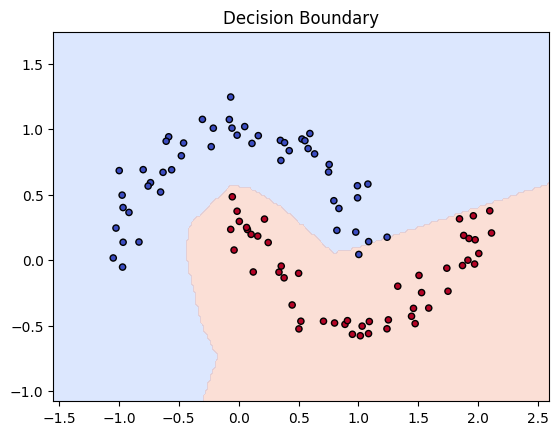

In [18]:
X = np.asarray(X)
y = np.asarray(y)

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

grid_step = 0.02

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, grid_step),
    np.arange(y_min, y_max, grid_step),
)

grid = np.c_[xx.ravel(), yy.ravel()]
grid_mat = numpy_to_matrix(grid)
preds = model.forward(grid_mat)

Z = np.array([preds[i, 0].getVal() for i in range(preds.rows)])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z > 0.5, alpha=0.3, cmap="coolwarm")
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap="coolwarm", edgecolor="k")
plt.title("Decision Boundary")
plt.show()